<a href="https://colab.research.google.com/github/DFIC-Quant-Fund/CompVision-W2024/blob/main/ImageGenerationScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


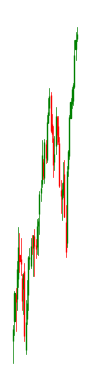

In [1]:
!pip install yfinance
!pip install matplotlib
!pip install mplfinance
!pip install numpy
!pip install pillow


import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

ticker_symbol = "SPY"
start_date = "2023-01-01"
end_date = "2024-01-01"
data = yf.download(ticker_symbol, start=start_date, end=end_date)
data_weekly = data.resample('W').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
data_weekly.reset_index(inplace=True)
data_weekly['Date'] = data_weekly['Date'].map(mdates.date2num)


fig = plt.figure(figsize=(1, 4))  #width and height
ax = fig.add_subplot()

candlestick_ohlc(ax, data_weekly.values, width=0.6, colorup='g', colordown='r')
ax.axis('off')
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.savefig('chart.png', bbox_inches='tight', pad_inches=0)


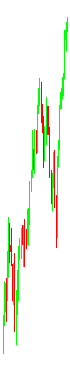

In [2]:
from PIL import Image
import numpy as np
from IPython.display import display

def round_color(pixel):
    target_colors = [(255, 255, 255), (255, 0, 0), (0, 255, 0)]
    distances = [np.linalg.norm(np.array(pixel) - np.array(color)) for color in target_colors]
    closest_index = np.argmin(distances)
    return target_colors[closest_index]

def convert_image(image_path):
    img = Image.open(image_path)
    img = img.convert('RGB')
    img_data = np.array(img)
    rounded_data = np.apply_along_axis(round_color, 2, img_data)
    rounded_img = Image.fromarray(rounded_data.astype(np.uint8))
    return rounded_img

input_image_path = "chart.png"
output_image_path = "chart2.png"
rounded_image = convert_image(input_image_path)
rounded_image.save(output_image_path)
display(Image.open("chart2.png"))
